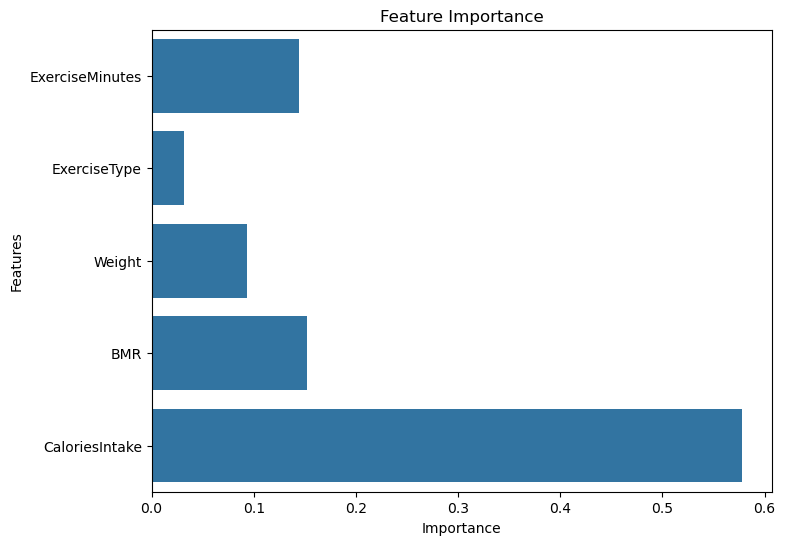


--- Fold 1 ---


C:\Users\JM\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.98

--- Fold 2 ---


C:\Users\JM\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.99

--- Fold 3 ---


C:\Users\JM\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.99

--- Fold 4 ---


C:\Users\JM\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.99

--- Fold 5 ---


C:\Users\JM\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Accuracy: 0.99

Average Validation Accuracy: 0.99 ± 0.00
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


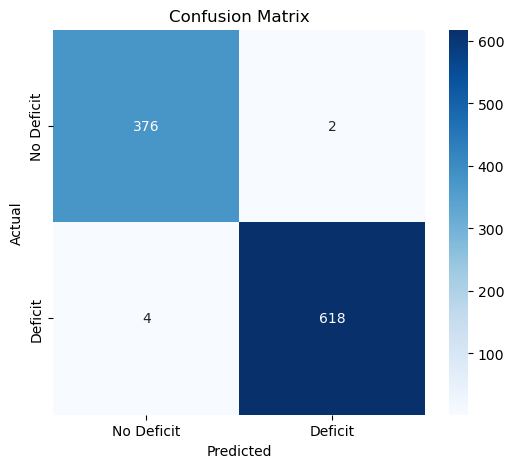


Prediction example: Probability: 1.00, In deficit


In [1]:
# Install Streamlit library (not directly used in this code but prepares for potential interactive web application)
# Streamlit can quickly convert data scripts into web apps, ideal for showcasing data analysis and model results
!pip install streamlit

# Import necessary libraries
# Data processing and numerical computation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.model_selection import KFold, cross_val_score  # For cross-validation
from sklearn.preprocessing import StandardScaler  # For feature standardization
from sklearn.ensemble import RandomForestClassifier  # Random Forest model (for feature importance analysis)

# Deep learning library (Keras)
from tensorflow.keras.models import Sequential  # Sequential model architecture
from tensorflow.keras.layers import Dense, Dropout  # Fully connected layers and dropout regularization
from tensorflow.keras.optimizers import Adam, SGD  # Optimization algorithms
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping to prevent overfitting

# Model evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Filter specific warning messages (to avoid redundant warnings about feature names)
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

# Neural network model definition example (showing proper input layer definition)
# Provides foundation for building more complex models later
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

model = Sequential()
model.add(Input(shape=(5,)))        # ✅ Recommended practice: explicitly define input shape with Input layer
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


# 1. Simulated data generation
# Since no real dataset is available, generate synthetic data to validate the model workflow
# Set random seed for reproducibility of results
np.random.seed(42)
num_samples = 1000  # Sample size: 1000 samples sufficient for training basic models

# Feature generation (selecting physiological and behavioral features related to calorie expenditure)
exercise_minutes = np.random.randint(0, 120, num_samples)  # Exercise duration (0-120 minutes)
exercise_type = np.random.choice([0, 1, 2], num_samples, p=[0.5, 0.3, 0.2])  # Exercise intensity (0=mild, 1=moderate, 2=vigorous)
weight = np.random.normal(70, 10, num_samples)  # Weight (mean 70kg, standard deviation 10)
# Basal Metabolic Rate (simplified formula based on weight, height, and age)
bmr = 10 * weight + 6.25 * np.random.normal(170, 10, num_samples) - 5 * np.random.normal(30, 10, num_samples) + np.random.normal(5, 2, num_samples)
calories_intake = np.random.normal(2000, 300, num_samples)  # Calorie intake (mean 2000, standard deviation 300)

# Calculate target variable: calorie deficit (1 if intake < expenditure, 0 otherwise)
# Calorie expenditure = basal metabolic expenditure + exercise expenditure (related to duration and intensity)
calories_burned = bmr * 1.2 + exercise_minutes * (2 + exercise_type * 1.5)
calorie_deficit = (calories_intake < calories_burned).astype(int)  # Convert to binary classification label

# Create DataFrame (structured data format for easier processing and analysis)
data = pd.DataFrame({
    'ExerciseMinutes': exercise_minutes,
    'ExerciseType': exercise_type,
    'Weight': weight,
    'BMR': bmr,
    'CaloriesIntake': calories_intake,
    'CalorieDeficit': calorie_deficit
})

# 2. Separate features and label
# Machine learning requires clear separation between input features (X) and prediction target (y)
X = data.drop('CalorieDeficit', axis=1)  # Features: all input variables
y = data['CalorieDeficit']  # Label: the calorie deficit status to predict

# 3. Data standardization
# Neural networks are sensitive to feature scales; standardization accelerates convergence and improves accuracy
scaler = StandardScaler()  # Standardization: transforms features to have mean 0 and standard deviation 1
X_scaled = scaler.fit_transform(X)  # Fit scaler to data and transform features

# 4. Use Random Forest to get feature importance
# Analyze how much each feature influences prediction results, enhancing model interpretability
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # Random Forest with 100 trees
rf.fit(X_scaled, y)  # Train the model

# Visualize feature importance (intuitively show influence weights of each factor)
plt.figure(figsize=(8, 6))  # Set figure size
sns.barplot(x=rf.feature_importances_, y=X.columns)  # Horizontal bar plot
plt.title('Feature Importance')  # Plot title
plt.xlabel('Importance')  # X-axis label
plt.ylabel('Features')  # Y-axis label
plt.show()  # Display the plot

# 5. Build neural network model
# Define flexible model building function supporting different optimizers and learning rates (facilitates parameter tuning)
def build_model(optimizer='adam', learning_rate=0.001):
    # Configure optimizer based on selection (different optimizers suit different scenarios)
    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)  # Adam: adaptive learning rate, suitable for most scenarios
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)  # SGD: stochastic gradient descent, more stable but slower convergence
    else:
        raise ValueError("Unsupported optimizer")  # Error for unsupported optimizers

    # Build neural network architecture (using multiple fully connected layers, suitable for tabular data)
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_scaled.shape[1],)),  # Input layer + first hidden layer (128 neurons)
        Dropout(0.3),  # Dropout layer: randomly deactivates 30% of neurons to prevent overfitting
        Dense(64, activation='relu'),  # Second hidden layer (64 neurons)
        Dropout(0.3),  # Additional dropout for enhanced generalization
        Dense(32, activation='relu'),  # Third hidden layer (32 neurons, gradually reducing dimensionality)
        Dense(1, activation='sigmoid')  # Output layer: sigmoid activation for 0-1 probability output
    ])
    
    # Compile model: define loss function, optimizer, and evaluation metrics
    model.compile(optimizer=opt,
                  loss='binary_crossentropy',  # Cross-entropy loss common for binary classification
                  metrics=['accuracy'])  # Monitor accuracy metric
    return model

# 6. Train model using K-Fold cross-validation
# Cross-validation provides more reliable model evaluation by avoiding randomness of single data split
kfold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with data shuffling
accuracies = []  # Store accuracy for each fold

# Iterate through each fold for training and validation
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_scaled, y)):
    print(f"\n--- Fold {fold + 1} ---")
    # Split into training and validation sets
    X_train, X_val = X_scaled[train_idx], X_scaled[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Build model (using Adam optimizer with learning rate 0.0005)
    model = build_model(optimizer='adam', learning_rate=0.0005)
    
    # Early stopping: halt training when validation loss stops improving (prevents overfitting)
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),  # Validation data
                        epochs=100,  # Maximum training epochs
                        batch_size=32,  # Batch size: 32 is a commonly used balanced choice
                        callbacks=[early_stop],  # Apply early stopping
                        verbose=0)  # Silent mode, no training logs

    # Evaluate model performance on validation set
    loss, acc = model.evaluate(X_val, y_val, verbose=0)
    print(f"Validation Accuracy: {acc:.2f}")
    accuracies.append(acc)

# Output cross-validation average results (more robust model performance metric)
print(f"\nAverage Validation Accuracy: {np.mean(accuracies):.2f} ± {np.std(accuracies):.2f}")

# 7. Model prediction and result visualization
# Analyze overall model performance and identify prediction error patterns
y_pred = (model.predict(X_scaled) > 0.5).astype(int).flatten()  # Convert probabilities to classes (0/1)

# Confusion matrix: shows distribution of true positives, true negatives, false positives, false negatives
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Deficit', 'Deficit'], 
            yticklabels=['No Deficit', 'Deficit'])
plt.xlabel('Predicted')  # Predicted labels
plt.ylabel('Actual')  # Actual labels
plt.title('Confusion Matrix')  # Plot title
plt.show()

# Example prediction function: encapsulates model for easy user input and prediction
def predict_deficit(minutes, exercise_type, weight, bmr, intake):
    # Feature standardization (using trained scaler to maintain consistent scale with training data)
    input_data = scaler.transform([[minutes, exercise_type, weight, bmr, intake]])
    # Predict probability
    prob = model.predict(input_data, verbose=0)[0][0]
    # Return result: probability value + classification conclusion
    return f"Probability: {prob:.2f}, {'In deficit' if prob >= 0.5 else 'Not in deficit'}"

# Test prediction functionality (verify practical application of the model)
# The parameters represent:
# 45: minutes of exercise per day
# 1: exercise type (1 = moderate intensity)
# 68: weight in kilograms
# 1600: basal metabolic rate in calories per day
# 1800: daily calorie intake
# The model will process these values through the same scaling as training data
# Then predict the probability of the person being in a calorie deficit (intake < expenditure)
# The result shows both the numerical probability and a categorical conclusion
print("\nPrediction example:", predict_deficit(45, 1, 68, 1600, 1800))
